# PROBLEM STATEMENT

•	A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.<BR>
    
•	A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <BR>
    
•	In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<BR>
    
•	They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<BR>
    
o	Which variables are significant in predicting the demand for shared bikes.<BR>
o	How well those variables describe the bike demands<BR>
o	Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors


=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
%matplotlib inline

import calendar
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# LOADING DATA

In [2]:
bike_1 = pd.read_csv('day.csv')
print(bike_1.shape)
bike_1.head(3)

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


# EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

In [3]:
# Checking for duplicates and dropping the duplicate row if any
print(bike_1.shape)
bike_2 = bike_1.copy()
bike_2.drop_duplicates(subset=None, inplace=True)
print(bike_2.shape)

# find missing values in dataset if any
print(bike_2.isnull().values.sum())

# percentage of missing values in each column
print((round(100*(bike_2.isnull().sum()/len(bike_2)), 2).sort_values()).sum())

(730, 16)
(730, 16)
0
0.0


There are no duplicate and missing values

In [4]:
# statistical information
bike_2.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# data types of all columns
bike_2.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# number of unique values in all columns
bike_2.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
# rename columns
bike_2.rename(columns={'dteday':'dateday','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

# Converting some numeric values to categorical data
bike_2['month'] = bike_2['month'].apply(lambda x: calendar.month_abbr[x])

# maping seasons
bike_2.season = bike_2.season.map({1: 'spring',2:'summer',3:'fall',4:'winter'})

# mapping weathersit
bike_2.weathersit = bike_2.weathersit.map({1:'Clear',2:'Mist_cloudy',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})

# mapping weekday
bike_2.weekday = bike_2.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

print(bike_2.shape)
bike_2.head(3)

(730, 16)


,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,sat,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,sun,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [8]:
# removing unwanted columns
bike_3 = bike_2.drop(['instant','dateday','casual','registered'],axis = 1) 
print(bike_3.shape)
bike_3.head(3)

(730, 12)


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,sat,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,sun,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349


instant : Its only an index value <br>
dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence we could drop <br>
casual & registered : Both these columns contains the count of bike booked by different categories of customers

# VISUALIZING DATA

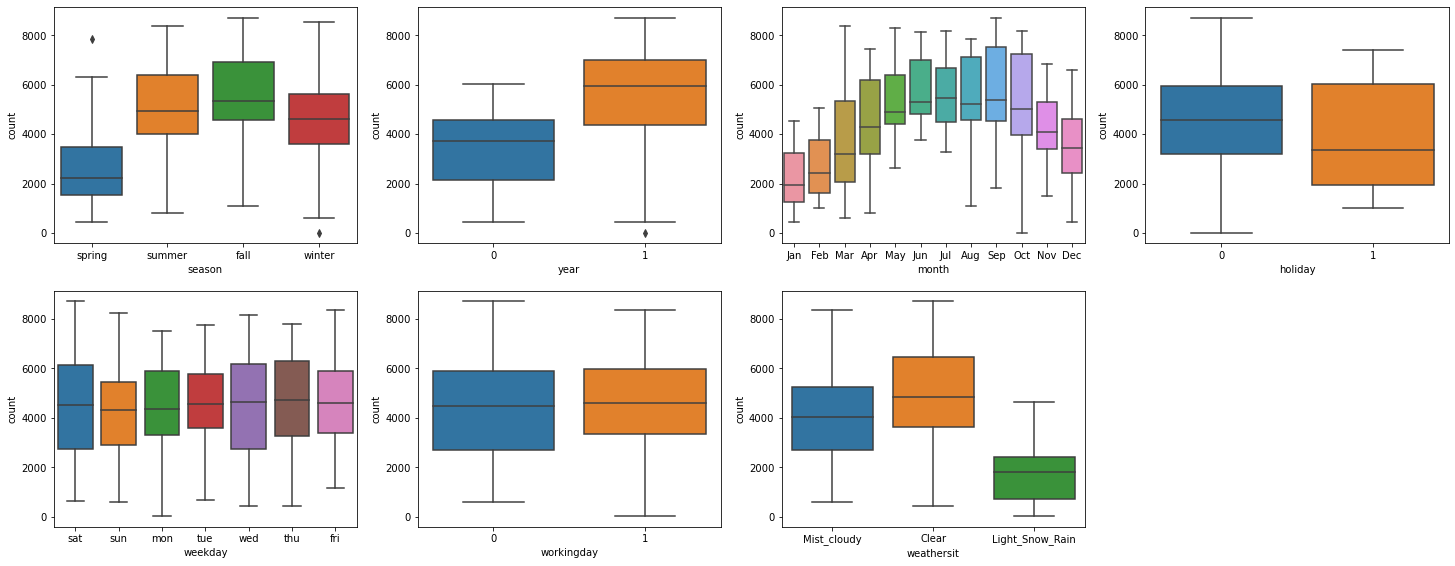

In [9]:
# Boxplot for categorical variables
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 20))
for i in enumerate(vars_cat):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(data=bike_3, x=i[1], y='count')
plt.show()

1. Fall season has highest demand for rental bikes followed by summer
2. Demand in year(1) 2019 has increased as compared to year(0) 2018
3. Demand is continuously growing each month till June whereas after September, demand is decreasing.
4. September month has the highest demand and January month has the lowest demand
5. When there is a holiday, demand has decreased.
6. Number of bookings are higher in clear weathersit whereas least in light snow rain
7. More bookings are there on saturday as compared to other days

<AxesSubplot:xlabel='holiday', ylabel='count'>

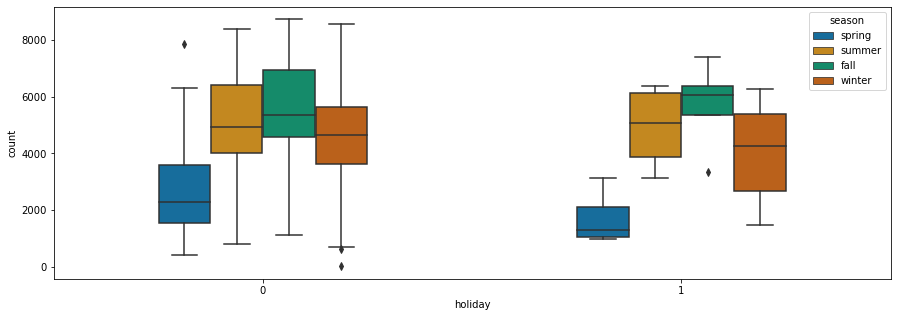

In [10]:
#group by season and see the difference between holiday and non-holiday
plt.figure(figsize=(15, 5))
sns.boxplot(y='count',x='holiday',data=bike_3,hue="season",width=0.5,palette="colorblind")

Variation can be seen among seasons when day is neither weekend nor holiday (1)

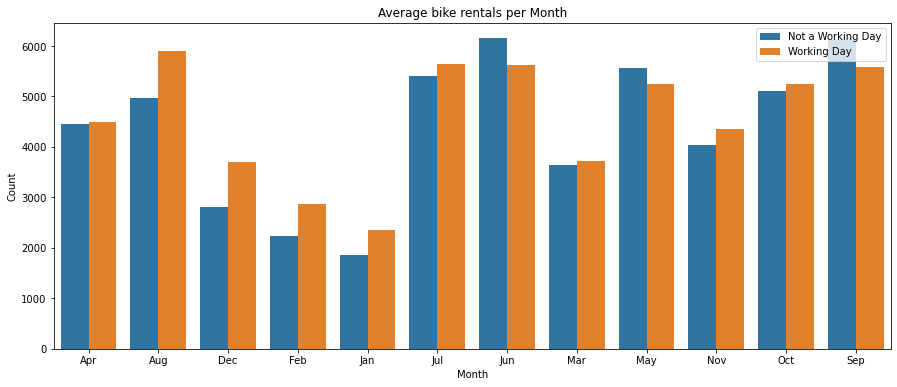

In [11]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(bike_3.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

Variation can be seen among months when day is neither weekend nor holiday (1) or holiday(0)

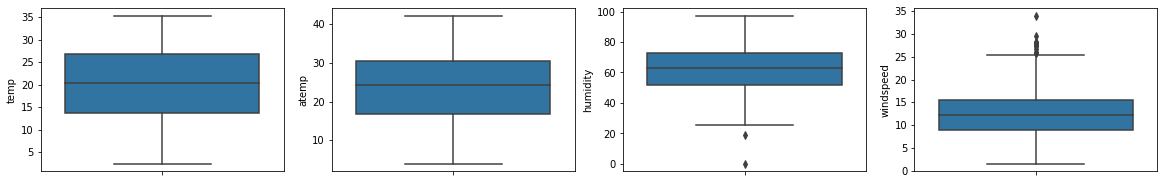

In [12]:
# box plots for independant variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(20,3))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_3)
    i+=1

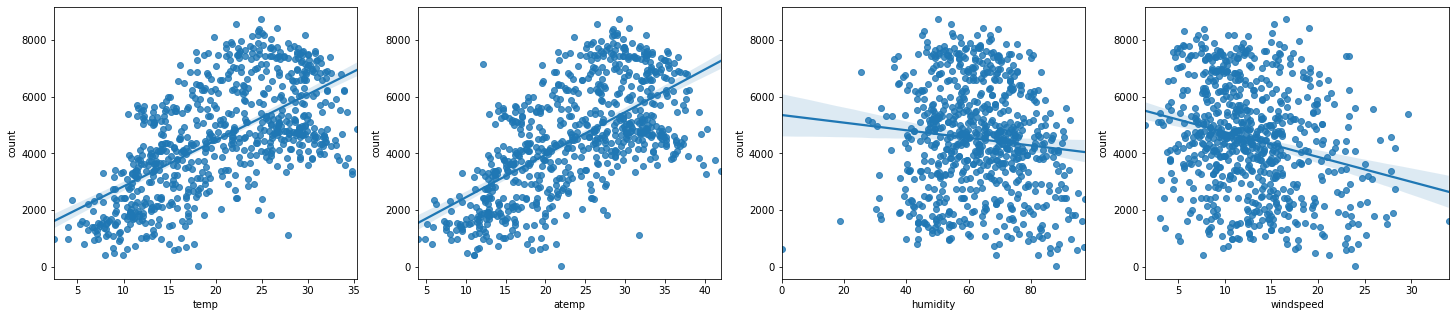

In [13]:
# Scatterplot for categorical variables
vars_cat = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(25, 5))
for i in enumerate(vars_cat):
    plt.subplot(1,4,i[0]+1)
    sns.regplot(data=bike_3, x=i[1], y='count')
plt.show()

1. count is linearly increasing with temp and atemp so demand for bikes is positively correlated to temp and atemp
2. humidity and windspeed values are more scattered and count is decreasing with increase in humidity and windspeed

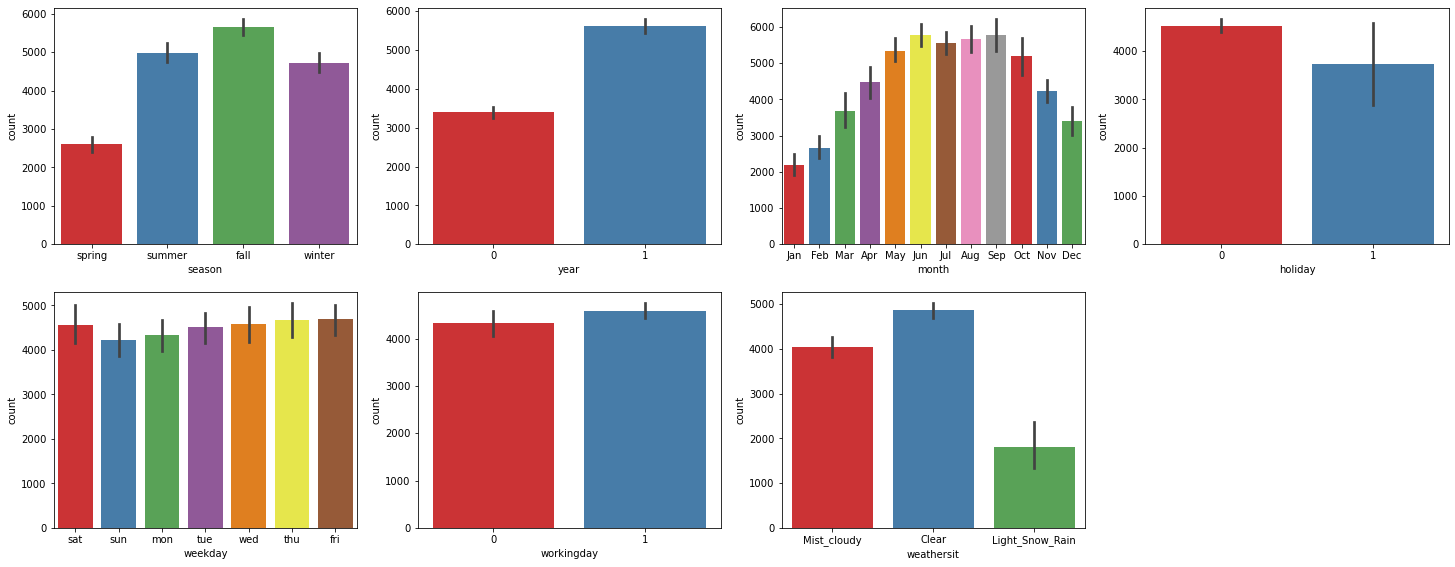

In [14]:
# Boxplot for categorical variables
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 20))
for i in enumerate(vars_cat):
    plt.subplot(4,4,i[0]+1)
    sns.barplot(data=bike_3, x=i[1], y='count',palette='Set1')
plt.show()

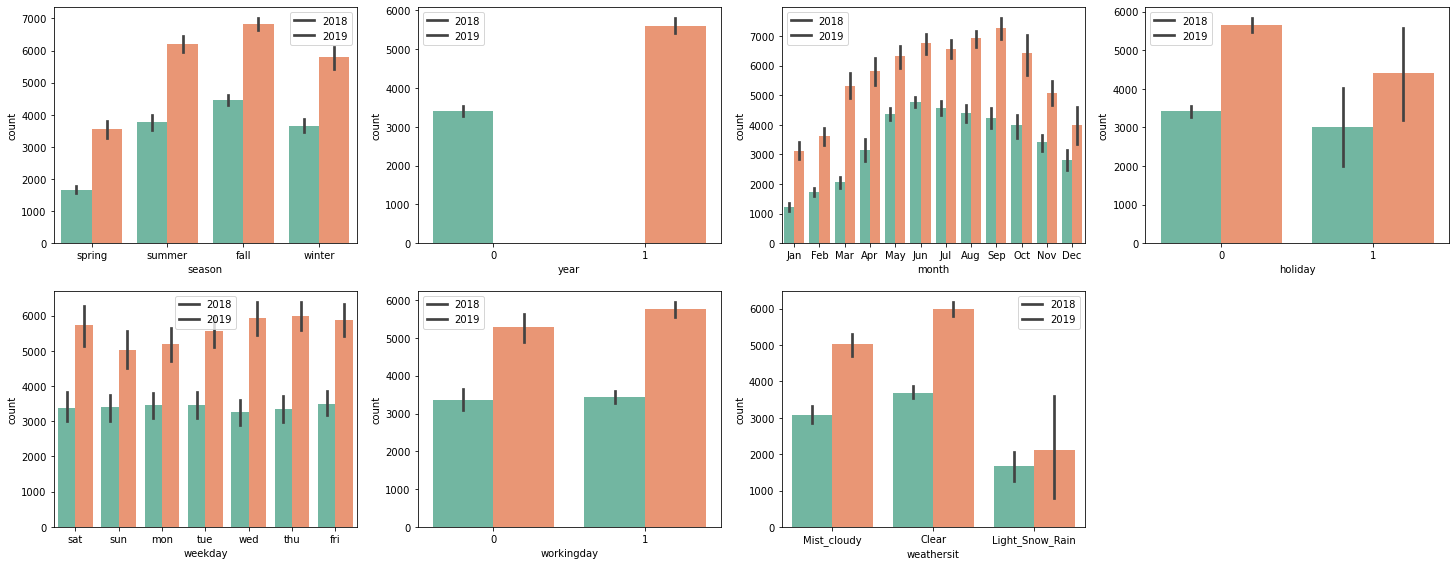

In [15]:
# Boxplot for categorical variables
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 20))
for i in enumerate(vars_cat):
    plt.subplot(4,4,i[0]+1)
    sns.barplot(data=bike_3, x=i[1], y='count', hue='year',palette='Set2')
    plt.legend(labels=['2018', '2019'])
plt.show()

1. Number of bookings are higher in fall season followed by summer.
2. Most of the bookings has been done during the month of may, june, july, aug, sep and oct.
3. Demand has increased in the starting of the year till mid of the year and then it started decreasing towards the end of year.
4. Number of booking for each month has increased from 2018 to 2019.
5. Clear weather has more booking. Booking increased for each weather in 2019 as compare to in 2018.
6. Wed,Thu, Fri, Sat have more number of bookings as compared to the other days of week.
7. Bookings are more on working day as compared to a non-working day.
8. More numbers of booking done in year 2019 as compared to 2018.

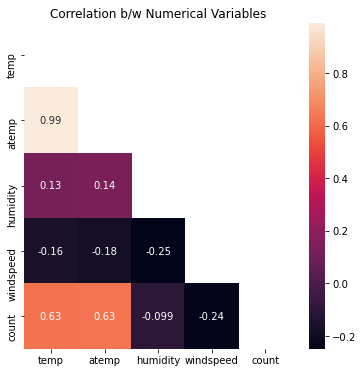

In [16]:
# correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(bike_3[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(bike_3[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, mask=matrix)
plt.title("Correlation b/w Numerical Variables")
plt.show()

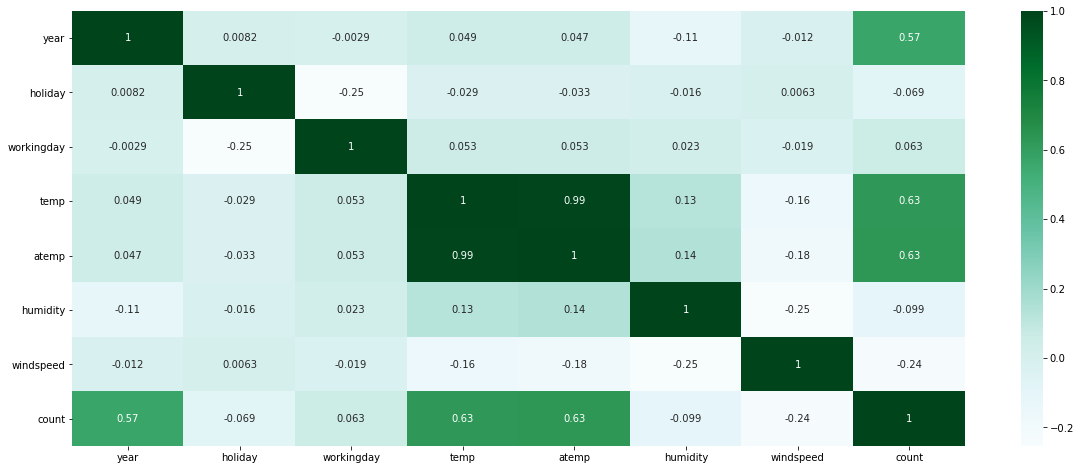

In [17]:
# Checking variables relationship with each other
plt.figure(figsize=(20,8))
sns.heatmap(bike_3.corr(), cmap='BuGn', annot = True)
plt.show()

From the correlation heatmap, temp, atemp seems to be highly correlated and only 1 variable should be considered for the model.

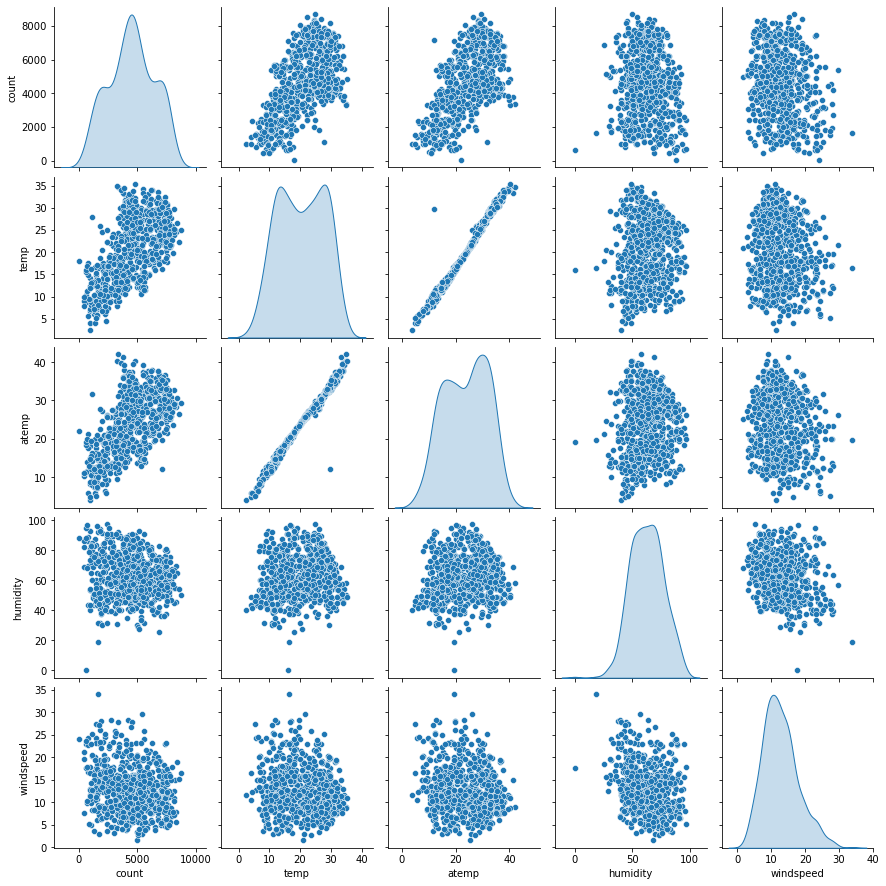

In [18]:
#pairplots for continuous numeric variables using seaborn
sns.pairplot(data=bike_3,vars=['count', 'temp', 'atemp', 'humidity','windspeed'], diag_kind='kde')
plt.show()

# Data Preparation

In [19]:
#Create Dummy variable,Drop original variable for which the dummy was created,Drop first dummy variable for each set of dummies created.
df = bike_3.copy()
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)
bike_4 = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
print(bike_4.shape)
bike_4.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
print(bike_4.shape)
print(bike_4.columns)
bike_4.head(2)

(730, 34)
(730, 30)
Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_Snow_Rain', 'Mist_cloudy', 'spring', 'summer', 'winter'],
      dtype='object')


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,sat,sun,thu,tue,wed,Light_Snow_Rain,Mist_cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0


# Train-Test Split

In [20]:
#Train Test split with 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(bike_4, train_size = 0.7, random_state = 100)
#specify 'random_state' so that the train and test data set always have the same rows, respectively
print(df_train.shape,df_test.shape)
df_train.head(2)

(510, 30) (220, 30)


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,sat,sun,thu,tue,wed,Light_Snow_Rain,Mist_cloudy,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0


In [21]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,sat,sun,thu,tue,wed,Light_Snow_Rain,Mist_cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [22]:
# Apply scaler() to all the numeric variables
scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
print(df_train.shape,df_test.shape)
df_train.head(2)

(510, 30) (220, 30)


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,sat,sun,thu,tue,wed,Light_Snow_Rain,Mist_cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0


In [23]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Aug,Dec,...,sat,sun,thu,tue,wed,Light_Snow_Rain,Mist_cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


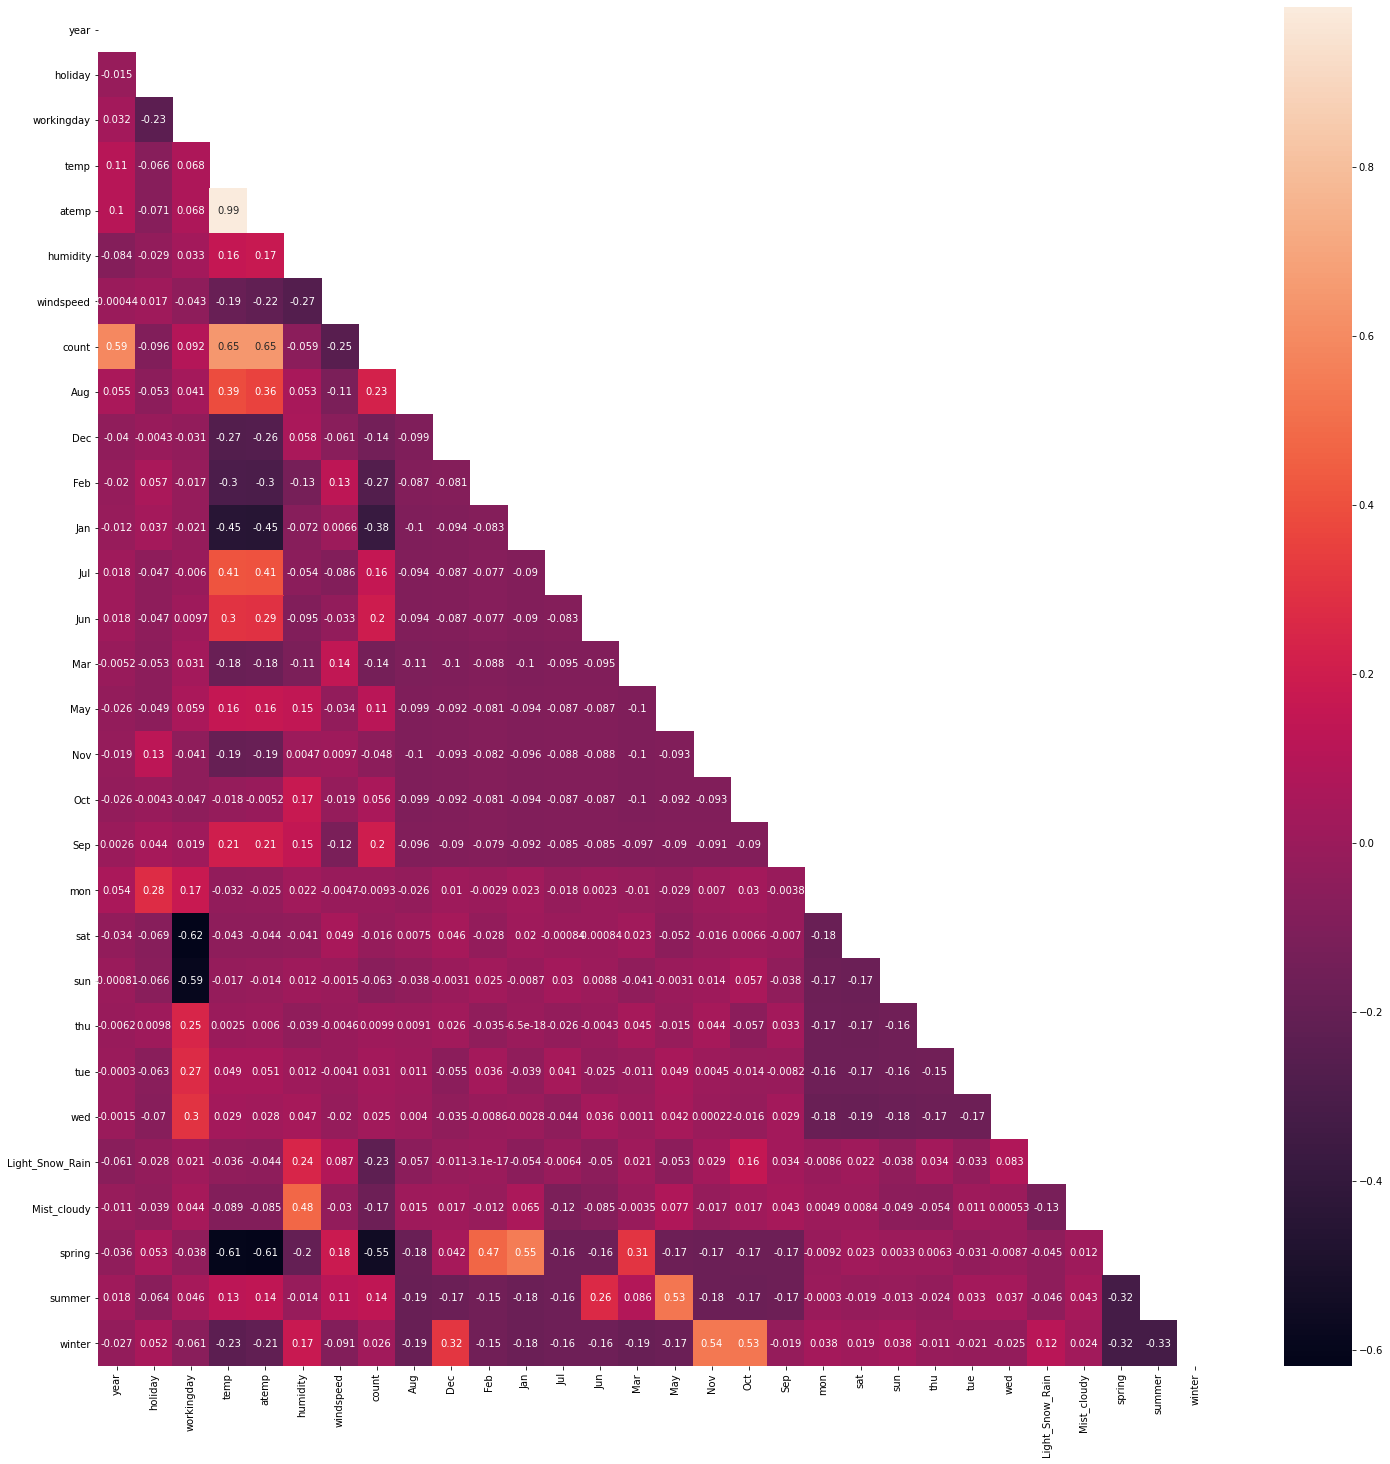

In [24]:
# check the correlation coefficients to see which variables are correlated to each other
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, mask=matrix)
plt.show()

1. count seems to have correlation with year, temp and atemp.
2. weathersit_Mist_cloudy and humidity variable shows correlation.
3. weathersit_Mist_cloudy and weathersit_Clear variable shows correlation.

# Linear Regression model using RFE and VIF

In [25]:
# function for calculating VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

# MODEL 1 - all variables selected by RFE

In [26]:
# Build the Linear Model
y_train = df_train.pop('count')
X_train = df_train

# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

# List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('mon', False, 15),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 14),
 ('wed', False, 12),
 ('Light_Snow_Rain', True, 1),
 ('Mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [27]:
# select the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

# check which columns has been rejected
print(X_train.columns[~rfe.support_])

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jul',
       'Sep', 'sat', 'sun', 'Light_Snow_Rain', 'Mist_cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')
Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')


In [28]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

# calculate VIF
calculateVIF(X_train_rfe)

# Build base linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.11e-191
Time:                        22:34:38   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

# MODEL 2 - holiday shows high P values hence we can drop it

In [29]:
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)
calculateVIF(X_train_new)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.11e-191
Time:                        22:34:38   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

# MODEL 3 - sun shows high P values hence we can drop it

In [30]:
X_train_new = X_train_new.drop(['sun'], axis = 1)
print(calculateVIF(X_train_new))

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

           Features    VIF
3          humidity  28.38
2              temp  16.88
1        workingday   4.72
4         windspeed   4.70
10           spring   4.18
12           winter   3.39
11           summer   2.84
9       Mist_cloudy   2.28
0              year   2.08
7               sat   1.84
5               Jul   1.58
6               Sep   1.38
8   Light_Snow_Rain   1.23
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.54e-191
Time:                        22:34:38   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                         

# MODEL 4 - humidity shows high VIF values hence we can drop it

In [31]:
X_train_new = X_train_new.drop(['humidity'], axis = 1)
print(calculateVIF(X_train_new))

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

           Features   VIF
2              temp  6.73
1        workingday  4.66
3         windspeed  4.64
9            spring  2.38
10           summer  2.32
0              year  2.07
11           winter  1.91
6               sat  1.83
4               Jul  1.58
8       Mist_cloudy  1.57
5               Sep  1.34
7   Light_Snow_Rain  1.08
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          7.12e-189
Time:                        22:34:38   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                     

# MODEL 5 - temp shows high VIF values hence we can drop it

In [32]:
X_train_new = X_train_new.drop(['temp'], axis = 1)
print(calculateVIF(X_train_new))

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

           Features   VIF
2         windspeed  4.16
1        workingday  3.54
9            summer  2.26
8            spring  2.25
0              year  1.91
10           winter  1.91
5               sat  1.62
7       Mist_cloudy  1.56
3               Jul  1.29
4               Sep  1.22
6   Light_Snow_Rain  1.08
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     149.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.65e-150
Time:                        22:34:38   Log-Likelihood:                 410.88
No. Observations:                 510   AIC:                            -797.8
Df Residuals:                     498   BIC:                            -746.9
Df Model:                          11                   

# MODEL 6 - Jul shows high P values hence we can drop it

In [33]:
X_train_new = X_train_new.drop(['Jul'], axis = 1)
print(calculateVIF(X_train_new))

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

          Features   VIF
2        windspeed  4.00
1       workingday  3.29
7           spring  2.00
8           summer  2.00
0             year  1.88
9           winter  1.73
4              sat  1.56
6      Mist_cloudy  1.56
3              Sep  1.18
5  Light_Snow_Rain  1.08
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.49e-151
Time:                        22:34:38   Log-Likelihood:                 410.80
No. Observations:                 510   AIC:                            -799.6
Df Residuals:                     499   BIC:                            -753.0
Df Model:                          10                                         
Covariance Typ

# MODEL 7 - summer  shows high P values hence we can drop it

In [34]:
X_train_new = X_train_new.drop(['summer'], axis = 1)
print(calculateVIF(X_train_new))

X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

          Features   VIF
2        windspeed  3.42
1       workingday  3.07
0             year  1.87
6      Mist_cloudy  1.53
4              sat  1.52
7           spring  1.50
8           winter  1.39
3              Sep  1.11
5  Light_Snow_Rain  1.08
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.73e-150
Time:                        22:34:38   Log-Likelihood:                 406.92
No. Observations:                 510   AIC:                            -793.8
Df Residuals:                     500   BIC:                            -751.5
Df Model:                           9                                         
Covariance Type:            nonrobust  

We have desired VIF values and p values and hence we can stop here

# Validation - Assumptions of LR

In [35]:
# Check the parameters and their coefficient values
print(round(lr_7.params,4))
X_train_lm_7.head(2)

const              0.5132
year               0.2480
workingday         0.0564
windspeed         -0.1861
Sep                0.0889
sat                0.0642
Light_Snow_Rain   -0.2994
Mist_cloudy       -0.0935
spring            -0.2743
winter            -0.0541
dtype: float64


,const,year,workingday,windspeed,Sep,sat,Light_Snow_Rain,Mist_cloudy,spring,winter
576,1.0,1,1,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,1,0,1,1,0


### Equation of best fitted line is-
count = 0.5132 + 0.2480 * year + 0.0564 * workingday -0.1861 * windspeed + 0.0889 * Sep + 0.0642 * sat 
-0.2994 * Light_Snow_Rain -0.0935 * Mist_cloudy -0.2743 * spring -0.0541 * winter             

Text(0.5, 0, 'Errors')

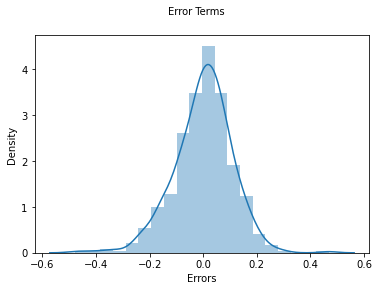

In [36]:
# prediction on test data 
y_train_pred = lr_7.predict(X_train_lm_7)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 10) 
plt.xlabel('Errors', fontsize = 10)

Error terms are following normal distribution

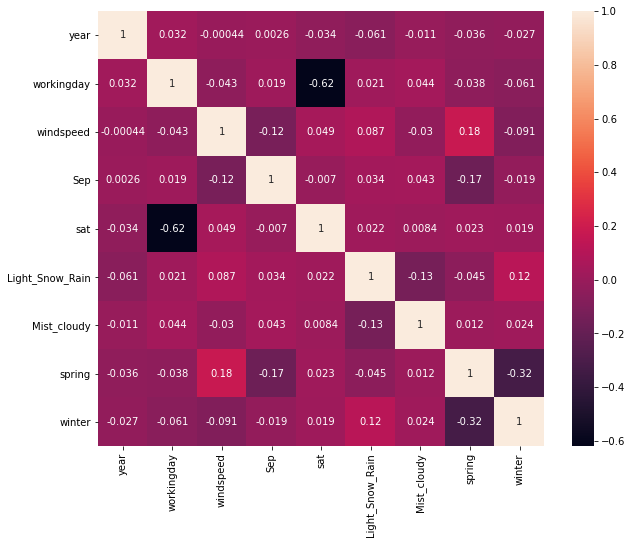

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

Heatmap doesnt show any Multicolinearity among any variables.

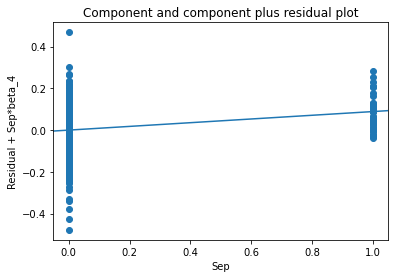

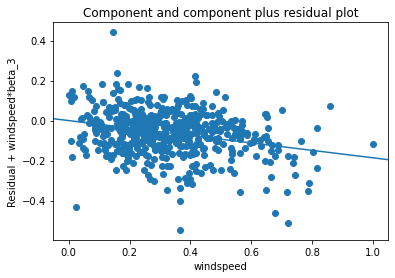

In [38]:
# Linear relationship validation using CCPR plot - Component and component plus residual plot
sm.graphics.plot_ccpr(lr_7, 'Sep')
plt.show()
sm.graphics.plot_ccpr(lr_7, 'windspeed')
plt.show()

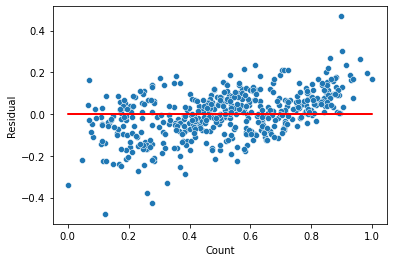

In [39]:
#Homoscedasticity
y_train_pred = lr_7.predict(X_train_lm_7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Durbin-Watson value of final model lr_7 is 2.037.It must be between 0 to 4.Hence, there is no auto-correlation.

# Model Prediction

In [40]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head(2)

y_test = df_test.pop('count')
X_test = df_test
col1 = X_train_new.columns

X_test = X_test[col1]

# Add constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)
y_pred = lr_7.predict(X_test_lm_7)

# Model validation

In [41]:
# test data
r2 = r2_score(y_test, y_pred)
print ("R2 score - test data :",round(r2,4))

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print ("Adjusted R2 score  - test data :",adjusted_r2)

R2 score - test data : 0.7473
Adjusted R2 score  - test data : 0.7364


In [42]:
print ("R2 score - train data :",0.764)
print ("Adjusted R2 score - train data :",0.760)

R2 score - train data : 0.764
Adjusted R2 score - train data : 0.76


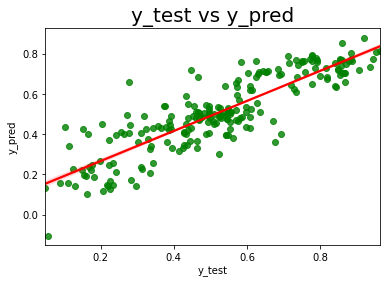

In [43]:
# Visualize the fit on the test data - plot a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()